<a href="https://colab.research.google.com/github/rwguerra/Machine-Learning-Bootcamp-IGTI/blob/main/trabalho_pratico_modulo_3_IGTI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0.1. IMPORTS



In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.dummy import DummyClassifier

# 0.2. LOAD DATASETS

In [9]:
df1 = pd.read_csv('/content/diabetes_numeric.csv') #REGRESSAO
df2 = pd.read_csv('/content/bloodtransf.csv')      #CLASSIFICACAO
df3 = pd.read_csv('/content/wine.csv')             #CLUSTERIZACAO

# 0.3. Questões

### 1 - Sobre o número de atributos da base de regressão, marque a alternativa CORRETA: **A base tem 3 atributos.**

In [ ]:
# temos 43 instâncias e 3 atributos
print(df1.shape)
df1.head(2)

(43, 3)


,age,deficit,c_peptide
0,5.2,-8.1,4.8
1,8.8,-16.1,4.1


### 2 - Sobre o número de atributos da base de classificação, marque a alternativa CORRETA: **A base tem 748 instâncias.**


In [ ]:
# temos 748 instâncias e 5 atributos
print(df2.shape)
df2.head(2)

(748, 5)


,V1,V2,V3,V4,Class
0,2,50,12500,98,2
1,0,13,3250,28,2


### 3 - Sobre a base de clusterização, marque a alternativa CORRETA: **A base tem 178 instâncias divididas em 3 classes.**

In [ ]:
# temos 748 instâncias e 5 atributos
print(df3.shape)
size = len(df3['class'].unique())
print(f'Quantidade de classes = {size}')
df3.head(2)

(178, 14)
Quantidade de classes = 3


,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


### 4 - Sobre dados faltantes, marque a alternativa CORRETA: **Nenhuma base tem dados faltantes.**

In [ ]:
#diabetes
print(df1.shape)
display(df1.info())
print('---------------------------------------------------')

#blood
print(df2.shape)
display(df2.info())
print('---------------------------------------------------')

#wine
print(df3.shape)
display(df3.info())

(43, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        43 non-null     float64
 1   deficit    43 non-null     float64
 2   c_peptide  43 non-null     float64
dtypes: float64(3)
memory usage: 1.1 KB


None

---------------------------------------------------
(748, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   V1      748 non-null    int64
 1   V2      748 non-null    int64
 2   V3      748 non-null    int64
 3   V4      748 non-null    int64
 4   Class   748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


None

---------------------------------------------------
(178, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   class                           178 non-null    int64  
 1   Alcohol                         178 non-null    float64
 2   Malic_acid                      178 non-null    float64
 3   Ash                             178 non-null    float64
 4   Alcalinity_of_ash               178 non-null    float64
 5   Magnesium                       178 non-null    int64  
 6   Total_phenols                   178 non-null    float64
 7   Flavanoids                      178 non-null    float64
 8   Nonflavanoid_phenols            178 non-null    float64
 9   Proanthocyanins                 178 non-null    float64
 10  Color_intensity                 178 non-null    float64
 11  Hue                             178

None

### 5 - Em relação a modelagem utilizando a regressão linear, marque a alternativa CORRETA sobre a métrica r2: **O r2 encontrado é aproximadamente 0.22.**


In [ ]:
# separa treino e teste
X_train, X_test, y_train, y_test = train_test_split(df1.iloc[:,0:2], df1.iloc[:,2:3], test_size=0.25, random_state=42)

In [ ]:
regr = LinearRegression()
regr.fit(X_train,y_train)
diabetes_y_pred = regr.predict(X_test)
print(f'Coefficient of determination: {round(metrics.r2_score(y_test, diabetes_y_pred),2)}')

Coefficient of determination: 0.22


### 6 - Em relação a modelagem utilizando a regressão linear, marque a alternativa CORRETA sobre a métrica MAE: **O MAE encontrado é aproximadamente 0.61.**

In [ ]:
print(f'Mean Absolute Error: {round(metrics.mean_absolute_error(y_test, diabetes_y_pred),2)}')

Mean Absolute Error: 0.61


### 7 - Em relação a modelagem utilizando a regressão linear, marque a alternativa CORRETA sobre a métrica MSE: **O MSE encontrado é aproximadamente 0.47.**

In [ ]:
print(f'Mean Squared Error: {round(metrics.mean_squared_error(y_test, diabetes_y_pred),2)}')

Mean Squared Error: 0.47


### 8 - Em relação a modelagem utilizando o SVM, marque a alternativa CORRETA sobre a métrica acurácia: **A acurácia encontrada é aproximadamente 0.75.**

In [10]:
# separa treino e teste
X_train, X_test, y_train, y_test = train_test_split(df2.iloc[:,0:4], df2.iloc[:,4:5], test_size=0.25, random_state=42)
clf = SVC()
clf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
blood_y_pred = clf.predict(X_test)
round(metrics.accuracy_score(y_test, blood_y_pred),2)

0.75

### 9 - Em relação a modelagem utilizando o SVM, marque a alternativa CORRETA sobre as métricas precision e recall: **Os valores de precision e recall encontrados são aproximadamente 1.0 e 0.02, respectivamente.**

In [ ]:
print(metrics.classification_report(y_test, blood_y_pred))
print(metrics.confusion_matrix(y_test, blood_y_pred))

0.7473118279569892
1.0
              precision    recall  f1-score   support

           1       0.75      1.00      0.86       139
           2       1.00      0.02      0.04        48

    accuracy                           0.75       187
   macro avg       0.87      0.51      0.45       187
weighted avg       0.81      0.75      0.65       187

[[139   0]
 [ 47   1]]


### 10 - Em relação a modelagem utilizando o SVM, marque a alternativa CORRETA sobre a métrica f1: **A f1 encontrada é aproximadamente 0.04.**

In [ ]:
print(metrics.classification_report(y_test, blood_y_pred))
print(metrics.confusion_matrix(y_test, blood_y_pred))

### 11 - Em relação a modelagem utilizando o SVM, marque a alternativa CORRETA sobre a métrica AUROC: **A AUROC encontrada é aproximadamente 0.51, indicando que o modelo apresenta um resultado próximo de uma baseline aleatório.**

0.4441696642685852
0.5104166666666666


/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


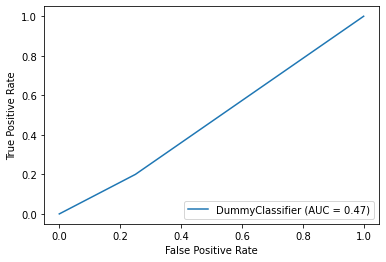

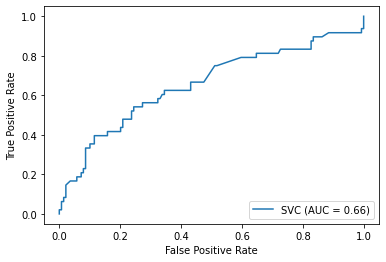

In [15]:
dummy = DummyClassifier()
dummy.fit(X_train,y_train)
dummy_y = dummy.predict(X_test)

print(metrics.roc_auc_score(y_test, dummy_y))
print(metrics.roc_auc_score(y_test, blood_y_pred))
metrics.plot_roc_curve(dummy, X_test, dummy_y)
metrics.plot_roc_curve(clf, X_test, y_test)
plt.show()

### 12 - Em relação a modelagem utilizando o Kmeans, marque a alternativa CORRETA sobre o número de clusters:

In [17]:
# nesse caso, como já sabemos de antemão a quantidade de classes existentes, talvez a resposta seja essa
len(df3['class'].unique())

3

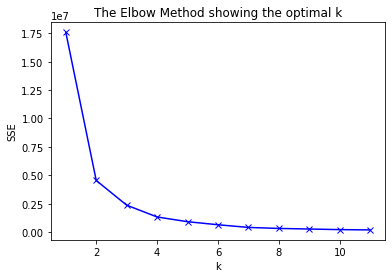

In [18]:
## Utilizando o método do cotovelo para ver se achamos o melhor valor de K
from scipy.spatial.distance import cdist
# k means determine k
X = df3.iloc[:,1:14]
distortions = []
K = range(1,12,1)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### 13 - Em relação a modelagem utilizando o Kmeans, marque a alternativa CORRETA sobre a métrica Coeficiente de Silhueta: **O coeficiente de silhueta encontrado é aproximadamente 0.55.**

In [19]:
name_to_class = {1: 0, 2: 1, 3: 2}
#substituindo os valores categóricos pelo mapeamento
df3['class'] = df3['class'].map(name_to_class)

X_train, X_test, y_train, y_test = train_test_split(df3.iloc[:,1:14], df3.iloc[:,0:1], test_size=0.25, random_state=42)

In [20]:
clustering = KMeans(n_clusters = 3, random_state = 42)
clustering.fit(X_train);
predictions1_labels = clustering.predict(X_test)
print('Coeficiente de Silhueta\n', round(metrics.silhouette_score(X_test, predictions1_labels),2)) 

Coeficiente de Silhueta
 0.55


### 14 - Em relação a modelagem utilizando o Kmeans, marque a alternativa CORRETA sobre a métrica Davies-Bouldin Score: **O Davies-Bouldin Score encontrado é aproximadamente 0.54.**

In [21]:
print('\nDavies-Bouldin Score\n', round(metrics.davies_bouldin_score(X_test, predictions1_labels),2)) 


Davies-Bouldin Score
 0.54


### 15 - Em relação a modelagem utilizando o Kmeans, marque a alternativa CORRETA sobre a métrica Mutual information: **O Mutual information encontrado é aproximadamente 0.53.**

In [39]:
import itertools
y_certo = np.array(list(itertools.chain.from_iterable(y_test.values)))
print('\nMutual information\n', round(metrics.mutual_info_score(y_certo, predictions1_labels),2)) 


Mutual information
 0.53
